In [2]:
import pandas as pd

In [4]:
import pandas as pd

df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")

C:\Users\User\AppData\Local\Temp\ipykernel_16020\4103054084.py:3: DtypeWarning: Columns (0,3,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/MachineLearningRating_v3.csv", sep="|")


In [5]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

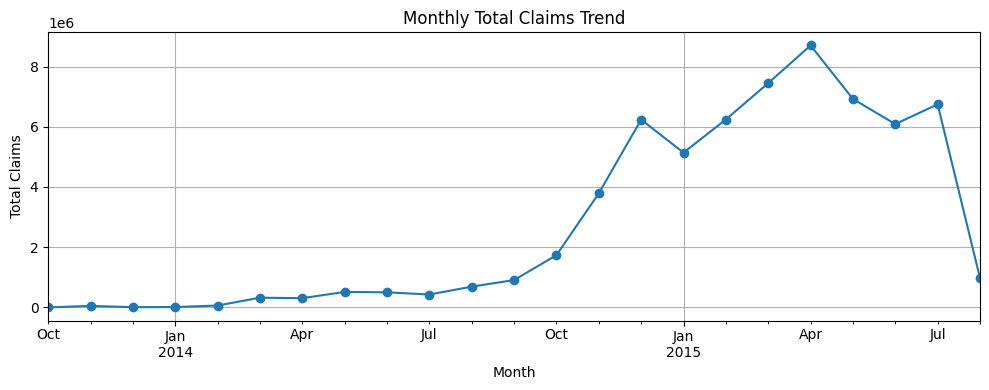

In [6]:
import matplotlib.pyplot as plt

monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
monthly_claims.plot(figsize=(10, 4), marker='o', title='Monthly Total Claims Trend')
plt.xlabel('Month')
plt.ylabel('Total Claims')
plt.grid(True)
plt.tight_layout()
plt.show()

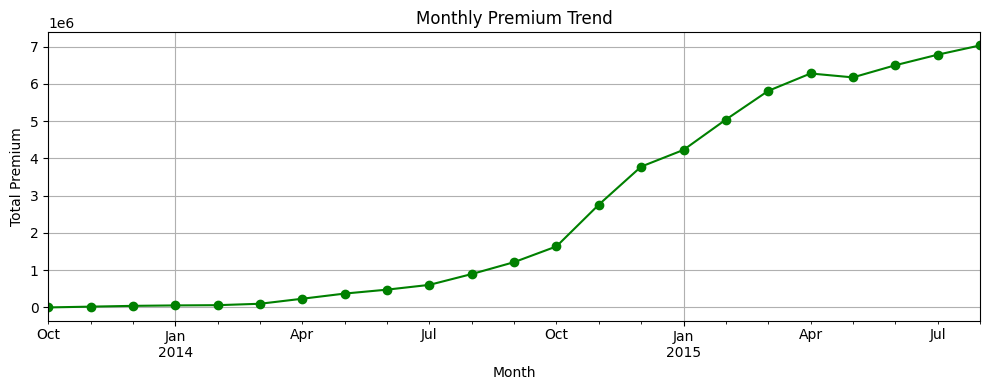

In [7]:
monthly_premium = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].sum()
monthly_premium.plot(figsize=(10, 4), marker='o', color='green', title='Monthly Premium Trend')
plt.xlabel('Month')
plt.ylabel('Total Premium')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np

In [11]:
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [12]:
# Create LossRatio column if not already created
if 'LossRatio' not in df.columns and 'TotalClaims' in df.columns and 'TotalPremium' in df.columns:
    df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
    df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan).fillna(0)

In [16]:
import numpy as np

In [17]:
import seaborn as sns

In [18]:
for col in ['PostalCode', 'ZipCode', 'Zip_Code']:
    print(col)  # or any logic inside the loop

PostalCode
ZipCode
Zip_Code


In [19]:
df['PostalCode']

0          1459.0
1          1459.0
2          1459.0
3          1459.0
4          1459.0
            ...  
1000093    7493.0
1000094    7493.0
1000095    7493.0
1000096    7493.0
1000097    7493.0
Name: PostalCode, Length: 1000098, dtype: float64

In [23]:
import os

# Create 'plots' folder if it doesn't exist
os.makedirs("plots", exist_ok=True)

In [24]:
plt.savefig("plots/distribution_total_premium.png")
plt.savefig("plots/distribution_total_claims.png")
plt.savefig("plots/distribution_custom_value_estimate.png")

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig("plots/boxplot_total_claims.png")
plt.savefig("plots/boxplot_custom_value_estimate.png")

<Figure size 640x480 with 0 Axes>

In [26]:
plt.savefig("plots/loss_ratio_by_gender.png")
plt.savefig("plots/loss_ratio_by_vehicle_type.png")
plt.savefig("plots/loss_ratio_by_province.png")

<Figure size 640x480 with 0 Axes>

In [27]:
plt.savefig("plots/loss_ratio_by_zip.png")

<Figure size 640x480 with 0 Axes>

In [28]:
plt.savefig("plots/correlation_matrix.png")

<Figure size 640x480 with 0 Axes>

In [29]:
plt.savefig("plots/monthly_total_claims.png")
plt.savefig("plots/monthly_total_premiums.png")

<Figure size 640x480 with 0 Axes>